In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Filter requirements.
order = 2
fs = 8000.0       # sample rate, Hz
cutoff = 400  # desired cutoff frequency of the filter, Hz

In [3]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
b, a = butter_lowpass(cutoff, fs, order)

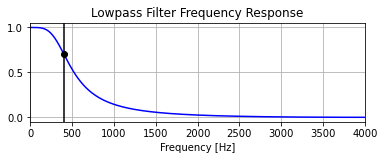

In [5]:
# Plot the frequency response.
w, h = freqz(b, a, worN=500)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [6]:
standard_output = np.abs(h)
len(standard_output)

500

In [7]:
test_output_1 = np.abs(h)
test_output_2 = np.abs(h)

In [8]:
for x in range(0, 500):
    test_output_1[x] = test_output_1[x] - (np.random.ranf(1)/100) + (np.random.ranf(1)/100) 
    test_output_2[x] = test_output_2[x] - (np.random.ranf(1)/10) + (np.random.ranf(1)/10) 

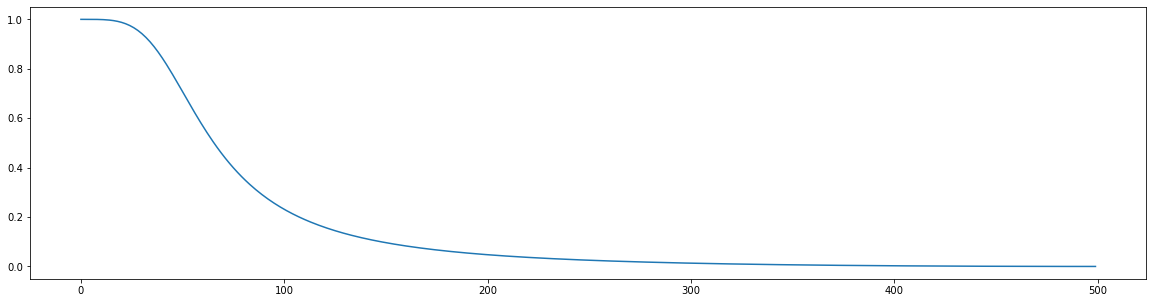

In [9]:
fig = plt.figure(figsize=(20, 5))
plt.plot(standard_output)

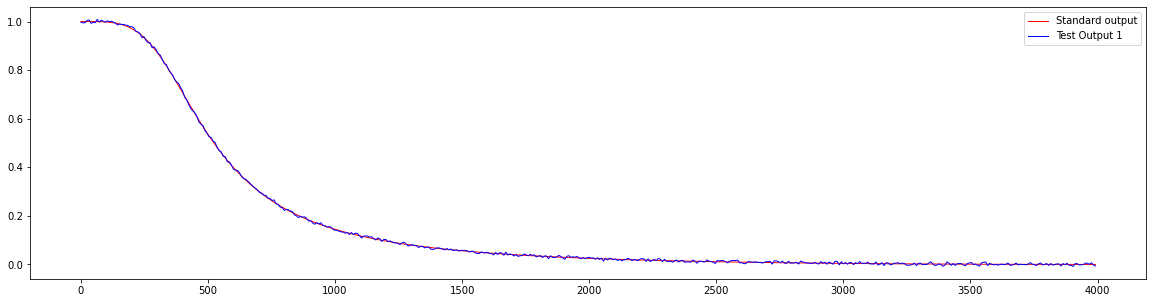

In [10]:
fig = plt.figure(figsize=(20, 5))
plt.plot(0.5*fs*w/np.pi, standard_output, 'r', label = 'Standard output', alpha = 1 , lw = 1)
plt.plot(0.5*fs*w/np.pi, test_output_1, 'b', label = 'Test Output 1', alpha = 1, lw = 1)
plt.legend()

In [11]:
 def error_fn(g1, g2, length):
    error_set = np.zeros(length,)
    normalized = np.zeros(length,)
    for x in range(0, length):
        error_set[x] = (g1[x]-g2[x])**2
        normalized[x] = (error_set[x]/g1[x])**2
    
    return sum(error_set), sum(normalized)

In [12]:
error_1, normalized_1 = error_fn(standard_output, test_output_1, 500)

In [13]:
1-error_1

0.9911187168927551

In [14]:
normalized_1

34730.14590438731

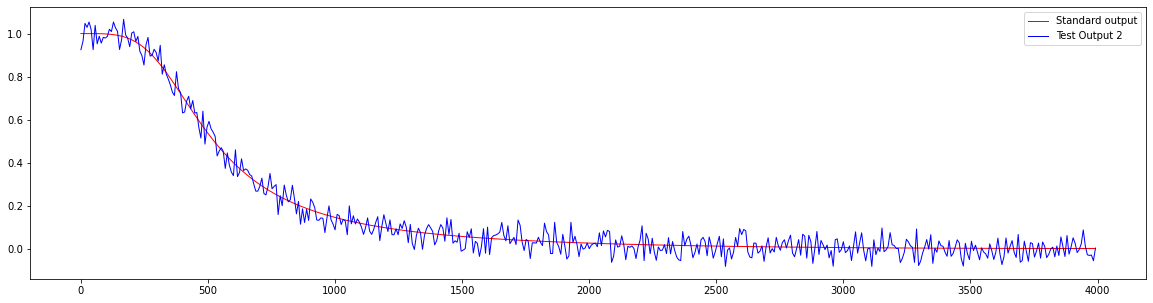

In [15]:
fig = plt.figure(figsize=(20, 5))
plt.plot(0.5*fs*w/np.pi, standard_output, 'r', label = 'Standard output', alpha = 1 , lw = 1)
plt.plot(0.5*fs*w/np.pi, test_output_2, 'b', label = 'Test Output 2', alpha = 1, lw = 1)
plt.legend()

In [16]:
error_2, normalized_2 = error_fn(standard_output, test_output_2, 500)

In [17]:
1-error_2

0.14309763270900444

In [18]:
normalized_2

11284620.640287684